# Data Transform to Normal Distribution

Content:

    1) Overview
    
    2) Define the Function
    
    3) Example
    

### 1) Overview

In [130]:
from numpy.random import seed
from numpy.random import randn
from numpy import exp
import numpy as np
from matplotlib import pyplot
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats import shapiro
import pandas as pd
%matplotlib inline

In [43]:
# data
data = np.random.normal(10,1,1000)

(0.9985837936401367, 0.61014723777771)

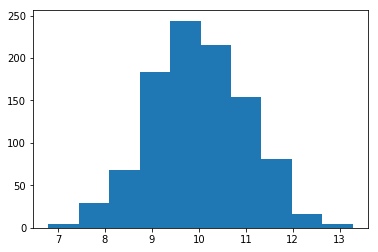

In [44]:
# plot the real data
plt.hist(data)
# if second argument (p-value) is greater than 0.05, the given data is normal, 
# Since the Null Hypothesis H0: "The data is normal"
stats.shapiro(data)

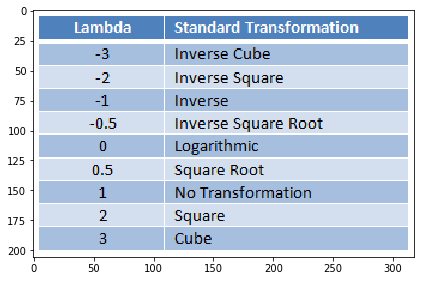

In [35]:
# just for reference
from skimage import io
io.imshow(io.imread("https://www.sigmamagic.com/blogs/images/trans3.png"))
io.show()

### 2) Define the Function

In [126]:
def Transform_the_data(data):
    Lambda_values = [-3,-2,-1,-0.5,0,0.5,1,2,3]
    Lambda_meaning = ['Inverse Cube','Inverse Square','Inverse','Inverse Square Root','Logarithmi with base with 10 or 2 or exp It gives the same p-value','Square Root','No Transformation','Square','Cube']
    df = {}
    shapiro_values = []
    p_value_greater_than_alpha = []
    for i in Lambda_values:
        data_transformed = boxcox(data,i)
        # shapiro p-value is greater than 0.05
        W_statistic, p_value = shapiro(data_transformed)
        shapiro_values.append(p_value)
        if p_value > 0.05:
            p_value_greater_than_alpha.append("Normal")
        else:
            p_value_greater_than_alpha.append("Non_Normal")

    # create a dataframe
    df['Lambda_values'] = Lambda_values
    df['Lambda_meaning'] = Lambda_meaning
    df['shapiro_p_values'] = shapiro_values
    df['Normal_or_Non_Normal'] = p_value_greater_than_alpha
    df = pd.DataFrame(df)
    # sort the data 
    df = df.sort_values('shapiro_p_values',ascending = False)
    return df

### 3) Example

In [136]:
# Defining the data

# Here we can use series or list format of the data
data = pd.Series([1,2,3,4,5,6,5,4,1,2,3,6,5,4,2,3,6,4,5,4,7,8,9,8,4,2,3,6,5,5,2,3,6,4,2,3,3,6,5,2,1,4])

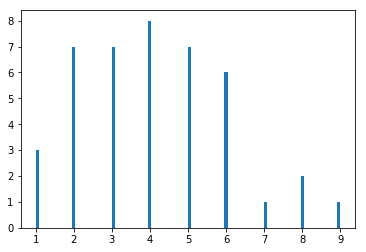

In [134]:
# plotting the data 
plt.hist(data,bins = 100)
plt.show()

In [135]:
# use the function
Transform_the_data(data)

,Lambda_values,Lambda_meaning,shapiro_p_values,Normal_or_Non_Normal
5,0.5,Square Root,1.999957e-01,Normal
6,1.0,No Transformation,8.891086e-02,Normal
4,0.0,Logarithmi with base with 10 or 2 or exp It gi...,1.150431e-02,Non_Normal
7,2.0,Square,6.229225e-05,Non_Normal
3,-0.5,Inverse Square Root,5.419059e-05,Non_Normal
2,-1.0,Inverse,2.651478e-07,Non_Normal
8,3.0,Cube,9.758186e-08,Non_Normal
1,-2.0,Inverse Square,2.046519e-10,Non_Normal
0,-3.0,Inverse Cube,7.308305e-12,Non_Normal
